<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Fraud_Detection_using_Random_Forrest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to predict whether a transaction is a valid transaction or a fraudulent transaction using the random forest classifier.

In [40]:
# Import required software libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [1]:
#Load the data on Google Colab 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving creditcard.csv to creditcard.csv


In [41]:
# Import the data set into a dataframe.
credit_data = pd.read_csv('creditcard.csv')

The credit card dataset contains real bank transactions from European credit  card holders in the year 2013. For security purposes, the actual variable names are not included and are labeled V followed by a number with the exception of amount and class. There are 30 feature columns and 1 target column named class.

In [42]:
# Data Analysis and Exploration. 
# Show number of rows and number of columns in the dataframe.
credit_data.shape

(284807, 31)

In [7]:
# Print the first 5 rows.
credit_data.head()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
# Show information about the data columns.
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Credit data does not contain any missing values or categorical data. 

Fraudulent transactions: 0.17%

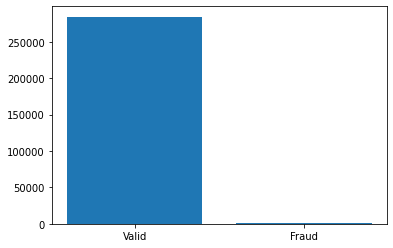

In [44]:
# Show plot of valid and fraudulent transactions and percent of fraud.
plt.bar(['Valid','Fraud'],list(credit_data['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= credit_data['Class'].value_counts()[1]/sum(credit_data['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

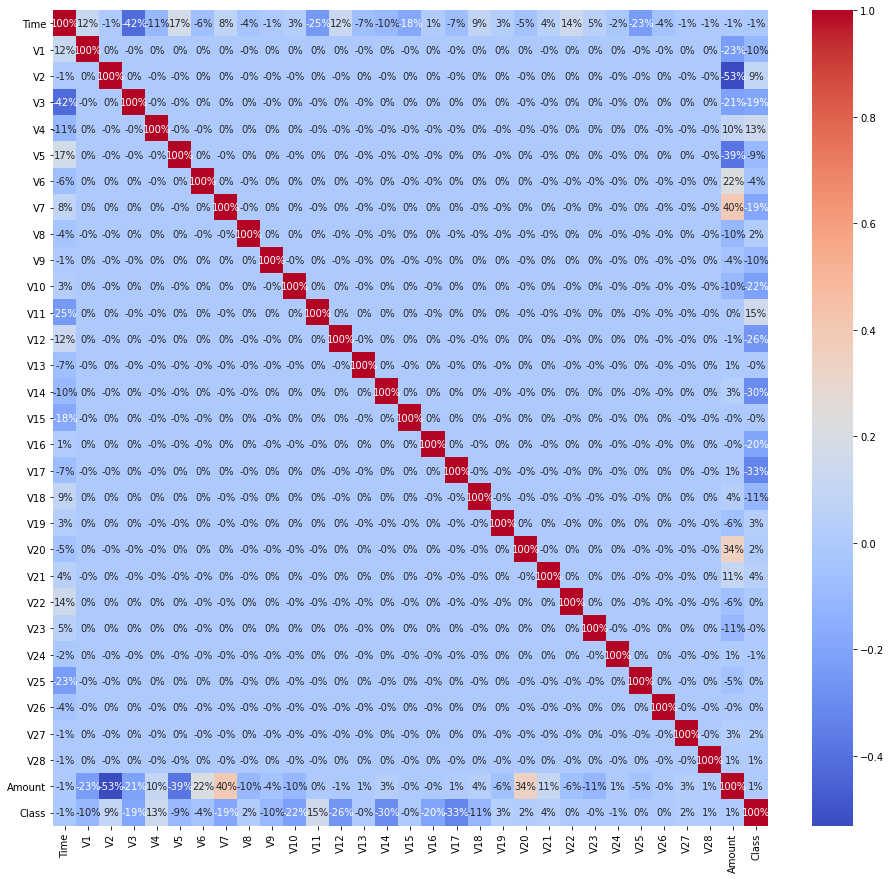

In [45]:
# Visualize the correlations between variables in a heat map.
plt.figure(figsize=(16,15))  
sns.heatmap(credit_data.corr(), annot=True, fmt='.0%', cmap='coolwarm')

There are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column. However, there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature. There are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column. However, there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature.

In [47]:
# Data Cleaning.
# Check the amount data for variances in the values.
min(credit_data.Amount), max(credit_data.Amount)

(0.0, 25691.16)

In [48]:
# Scale the amount variable using standard scaler to correct for wide variances in the amounts. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = credit_data['Amount'].values
credit_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [49]:
# Remove the time variable as it has limited value.
credit_data.drop(['Time'], axis=1, inplace=True)

In [50]:
# Split the data into test and training data sets.
# Import the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

In [51]:
# Specify the features data (x) and the target data (y) from the data set. 
# x data will be all of the data columns except for the Class.
# y data will be only the Class column.
x = credit_data.drop('Class', axis = 1)
y = credit_data['Class']

In [52]:
# Create the training data and test data with test data size of 30%. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [53]:
# Import the RandomForestClassifier class from the ensemble module of sklearn.
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Create an instance of the classifier and assign it to a model variable.
model = RandomForestClassifier()

In [55]:
# Train the model using the fit method and training data. 
model.fit(x_training_data, y_training_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
# Make predictions using the random forest model and predict method on the test data.
predictions = model.predict(x_test_data)

In [57]:
# Evaluate the models performance.  
# Import classification_report and confusion_matrix functions.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
# Create and display the classification report.
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.97      0.81      0.88       139

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



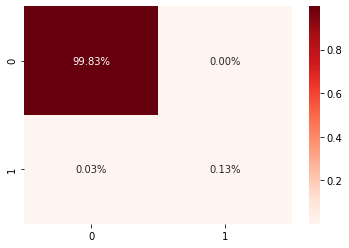

In [59]:
# Create and display the confusion matrix.
cm1 = confusion_matrix(y_test_data, predictions)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

Conclusions:                                                                  The random forest model did an excellent job in predicting fradulent transactions. This model correctly predicted 99.96% of fradulent transactions and incorrectly predicted .03% of fradulent transactions which were false negatives. The data was heavily weighted towards valid transactions. The confusion matrix showed us that the model was not overfitted.      